In [1]:
from sim import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Teste com 10 nós de fog e 10 requisições por sensor

In [2]:
tests = [100, 1000, 10000, 100000]
timeResults = list()
dropsResults = list()
simulations = [Simulation(sensors=i, fogs=10, requests=10) for i in tests]
for s in simulations:
    s.sim()  
    timeResults.append(s.timeResult())
    dropsResults.append(s.dropResult())


device 0 
Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  7.75219298245614 avg mem:  1.514100191885965 
avgNET:  6.201754385964913 avg disk:  1.2403508771929825 
DropRate:  0.0 
TryCount: 114 
AvgTime: 32.46641368196722  ms

device 1 
Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  8.303571428571429 avg mem:  1.6217912946428572 
avgNET:  6.642857142857143 avg disk:  1.3285714285714283 
DropRate:  0.0 
TryCount: 154 
AvgTime: 32.407460274634424  ms

device 2 
Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  8.263157894736842 avg mem:  1.6138980263157894 
avgNET:  6.610526315789474 avg disk:  1.322105263157895 
DropRate:  0.0 
TryCount: 95 
AvgTime: 32.649966290122585  ms

device 3 
Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  7.982142857142857 avg mem:  1.5590122767857142 
avgNET:  6.385714285714286 avg disk:  1.2771428571428574 
DropRate:  0.0 
TryCount: 70 
AvgTime: 32.16194425310407  ms

device 4 
Cores: 4

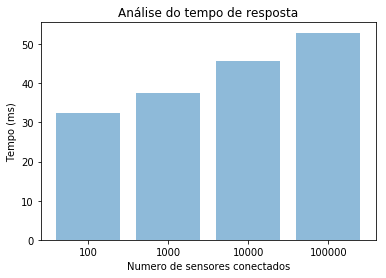

In [3]:
objects = tests
y_pos = np.arange(len(tests))
plt.bar(y_pos, timeResults, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Tempo (ms)')
plt.xlabel('Numero de sensores conectados')
plt.title('Análise do tempo de resposta')
plt.show()

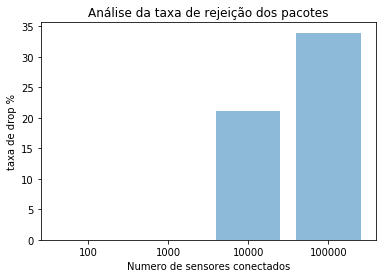

In [4]:
objects = tests
y_pos = np.arange(len(tests))
plt.bar(y_pos, dropsResults, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('taxa de drop %')
plt.xlabel('Numero de sensores conectados')
plt.title('Análise da taxa de rejeição dos pacotes')
plt.show()

## Teste com 100 nós de fog e 10 requisições por sensor

In [5]:
tests = [100, 1000, 10000, 100000]
timeResults = list()
dropsResults = list()
simulations = [Simulation(sensors=i, fogs=100, requests=10) for i in tests]
for s in simulations:
    s.sim()  
    timeResults.append(s.timeResult())
    dropsResults.append(s.dropResult())


device 0 
Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  2.0 avg mem:  0.390625 
avgNET:  1.6 avg disk:  0.32 
DropRate:  0.0 
TryCount: 5 
AvgTime: 32.43436813354492  ms

device 1 
Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  1.7857142857142858 avg mem:  0.34877232142857145 
avgNET:  1.4285714285714286 avg disk:  0.28571428571428575 
DropRate:  0.0 
TryCount: 7 
AvgTime: 32.427685601370676  ms

device 2 
Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  1.875 avg mem:  0.3662109375 
avgNET:  1.5 avg disk:  0.30000000000000004 
DropRate:  0.0 
TryCount: 12 
AvgTime: 32.492637634277344  ms

device 3 
Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  1.7857142857142858 avg mem:  0.34877232142857145 
avgNET:  1.4285714285714286 avg disk:  0.2857142857142857 
DropRate:  0.0 
TryCount: 14 
AvgTime: 32.8148433140346  ms

device 4 
Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  1.875 avg mem:  0.3


device 0 
Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  7.332677165354331 avg mem:  1.4321635088582678 
avgNET:  5.866141732283465 avg disk:  1.1732283464566933 
DropRate:  0.0 
TryCount: 122 
AvgTime: 32.83053683483694  ms

device 1 
Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  6.430722891566265 avg mem:  1.2560005647590362 
avgNET:  5.144578313253012 avg disk:  1.0289156626506024 
DropRate:  0.0 
TryCount: 76 
AvgTime: 32.23141130194607  ms

device 2 
Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  7.0413669064748206 avg mem:  1.3752669739208634 
avgNET:  5.633093525179856 avg disk:  1.1266187050359713 
DropRate:  0.0 
TryCount: 127 
AvgTime: 32.39423250980514  ms

device 3 
Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  6.211734693877551 avg mem:  1.213229432397959 
avgNET:  4.969387755102041 avg disk:  0.9938775510204082 
DropRate:  0.0 
TryCount: 84 
AvgTime: 32.15768385906609  ms

device 4 
Cores: 

Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  6.997767857142857 avg mem:  1.3667515345982142 
avgNET:  5.598214285714286 avg disk:  1.1196428571428574 
DropRate:  0.0 
TryCount: 105 
AvgTime: 33.234532390322  ms

device 0 
Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  14.575932504440498 avg mem:  2.8468618172735347 
avgNET:  11.660746003552397 avg disk:  2.33214920071048 
DropRate:  0.0 
TryCount: 999 
AvgTime: 33.40952265114387  ms

device 1 
Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  14.27721088435374 avg mem:  2.7885177508503403 
avgNET:  11.421768707482993 avg disk:  2.2843537414965995 
DropRate:  0.0 
TryCount: 799 
AvgTime: 33.020539078312396  ms

device 2 
Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  14.432753888380605 avg mem:  2.8188972438243365 
avgNET:  11.546203110704482 avg disk:  2.3092406221408974 
DropRate:  0.0 
TryCount: 954 
AvgTime: 33.46689076785744  ms

device 3 
Cores: 4 RAM: 

avgNET:  11.695522388059702 avg disk:  2.339104477611941 
DropRate:  0.0 
TryCount: 893 
AvgTime: 33.44270981366362  ms

device 0 
Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  29.302575603440303 avg mem:  5.7231592975469345 
avgNET:  23.442060482752243 avg disk:  4.688412096550448 
DropRate:  0.0 
TryCount: 9687 
AvgTime: 33.95024012275709  ms

device 1 
Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  29.765345444536194 avg mem:  5.813544032135976 
avgNET:  23.812276355628956 avg disk:  4.7624552711257895 
DropRate:  0.0 
TryCount: 10017 
AvgTime: 33.678071478526846  ms

device 2 
Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  29.827502664986916 avg mem:  5.825684114255258 
avgNET:  23.862002131989534 avg disk:  4.772400426397903 
DropRate:  0.0 
TryCount: 9226 
AvgTime: 33.619525070072136  ms

device 3 
Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  27.481724758978704 avg mem:  5.367524366988029 
avgNET: 

avgNET:  23.336566186107472 avg disk:  4.66731323722149 
DropRate:  0.0 
TryCount: 10090 
AvgTime: 33.53149208662134  ms

device 66 
Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  28.880732831836934 avg mem:  5.640768131218151 
avgNET:  23.104586265469546 avg disk:  4.620917253093907 
DropRate:  0.0 
TryCount: 11064 
AvgTime: 33.44005550235488  ms

device 67 
Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  29.05905215646941 avg mem:  5.675596124310431 
avgNET:  23.247241725175527 avg disk:  4.649448345035105 
DropRate:  0.0 
TryCount: 10872 
AvgTime: 33.57632335154598  ms

device 68 
Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  29.118100308209584 avg mem:  5.687128966447184 
avgNET:  23.294480246567666 avg disk:  4.658896049313531 
DropRate:  0.0 
TryCount: 9471 
AvgTime: 33.74390634622429  ms

device 69 
Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  29.72558223506048 avg mem:  5.80577778028525 
avgNET:  

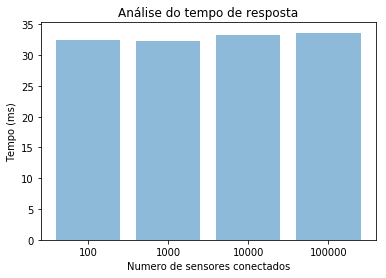

In [6]:
objects = tests
y_pos = np.arange(len(tests))
plt.bar(y_pos, timeResults, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Tempo (ms)')
plt.xlabel('Numero de sensores conectados')
plt.title('Análise do tempo de resposta')
plt.show()

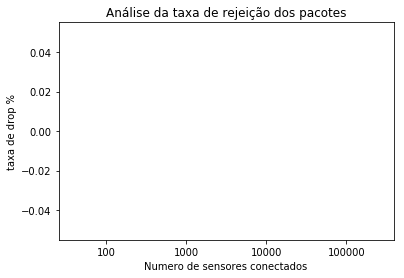

In [7]:
objects = tests
y_pos = np.arange(len(tests))
plt.bar(y_pos, dropsResults, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('taxa de drop %')
plt.xlabel('Numero de sensores conectados')
plt.title('Análise da taxa de rejeição dos pacotes')
plt.show()

## Teste com 10 nós de fog e 100 requisições por sensor

In [ ]:
tests = [100, 1000, 10000, 100000]
timeResults = list()
dropsResults = list()
simulations = [Simulation(sensors=i, fogs=10, requests=100) for i in tests]
for s in simulations:
    s.sim()  
    timeResults.append(s.timeResult())
    dropsResults.append(s.dropResult())


device 0 
Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  83.59136966230649 avg mem:  16.326439387169234 
avgNET:  66.87309572984519 avg disk:  13.374619145969165 
DropRate:  0.0 
TryCount: 1063 
AvgTime: 47.57479902155437  ms

device 1 
Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  83.27301938474506 avg mem:  16.26426159858302 
avgNET:  66.61841550779604 avg disk:  13.323683101559258 
DropRate:  0.0 
TryCount: 1272 
AvgTime: 47.22728005351771  ms

device 2 
Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  83.70166944021527 avg mem:  16.347982312542047 
avgNET:  66.96133555217222 avg disk:  13.392267110434473 
DropRate:  0.0 
TryCount: 776 
AvgTime: 47.3354392604965  ms

device 3 
Cores: 4 RAM: 2048 
CPU freq: 1200 
NET: 100 Disk: 15000 
avgCPU:  83.45825781703648 avg mem:  16.300440979889938 
avgNET:  66.76660625362918 avg disk:  13.353321250725804 
DropRate:  0.0 
TryCount: 904 
AvgTime: 47.61590209801586  ms

device 4 
Cores

In [ ]:
objects = tests
y_pos = np.arange(len(tests))
plt.bar(y_pos, timeResults, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Tempo (ms)')
plt.xlabel('Numero de sensores conectados')
plt.title('Análise do tempo de resposta')
plt.show()

In [ ]:
objects = tests
y_pos = np.arange(len(tests))
plt.bar(y_pos, dropsResults, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('taxa de drop %')
plt.xlabel('Numero de sensores conectados')
plt.title('Análise da taxa de rejeição dos pacotes')
plt.show()